In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Import Data

In [3]:
X_train = pd.read_csv('data/agg_train_test_split/X_train_aggregated.csv')

In [4]:
X_test= pd.read_csv('data/agg_train_test_split/X_test_aggregated.csv')

In [5]:
y_train = pd.read_csv('data/agg_train_test_split/y_train_agg.csv')

In [6]:
y_test = pd.read_csv('data/agg_train_test_split/y_test_agg.csv')

In [7]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4328, 55)

(1082, 55)

(4328, 1)

(1082, 1)

In [8]:
X_train.head()

,Provider,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
1,PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
2,PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
3,PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
4,PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000


In [9]:
X_train.set_index('Provider',inplace = True)

In [10]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000


In [11]:
X_test.set_index('Provider',inplace = True)

In [12]:
X_test.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53763,1068.000000,1068.0,11.793103,12.000000,2823.275862,15970,163750,608.448276,5020,35290,...,0.568966,0.155172,0.482759,0.500000,0.879310,0.913793,0.258621,0.465517,0.172414,0.017241
PRV54670,1.509434,100.0,12.000000,12.000000,2088.301887,21660,332040,647.735849,6480,102990,...,0.377358,0.194969,0.421384,0.459119,0.723270,0.754717,0.314465,0.238994,0.113208,0.006289
PRV54542,271.000000,1068.0,11.400000,12.000000,1823.000000,5170,36460,325.000000,1000,6500,...,0.700000,0.200000,0.250000,0.450000,0.750000,0.900000,0.200000,0.600000,0.200000,0.000000
PRV52515,2.352941,40.0,12.000000,12.000000,1745.882353,6870,29680,312.941176,1240,5320,...,0.352941,0.176471,0.529412,0.235294,0.647059,0.647059,0.235294,0.470588,0.000000,0.058824
PRV54724,718.085714,1068.0,11.830986,11.915493,1553.239437,31760,110280,420.281690,6840,29840,...,0.549296,0.112676,0.436620,0.338028,0.732394,0.830986,0.338028,0.394366,0.112676,0.000000


In [13]:
y_train = y_train.iloc[:,0].ravel()   #original y_train is a dataframe. Needs to convert to 1d array for modeling

In [14]:
y_test = y_test.iloc[:,0].ravel()

## 2. Model Building with Default Settings

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
steps = [#('rescale', StandardScaler()), 
         ('rescale', MinMaxScaler()),
         ('logreg', LogisticRegression(random_state=42,max_iter=10000))]
model = Pipeline(steps)
model.fit(X_train, y_train)

Pipeline(steps=[('rescale', MinMaxScaler()),
                ('logreg',
                 LogisticRegression(max_iter=10000, random_state=42))])

#### 2.1 Predicting

In [16]:
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
y_train_proba = model.predict_proba(X_train)
y_train_proba

array([[0.9299888 , 0.0700112 ],
       [0.99161123, 0.00838877],
       [0.9921202 , 0.0078798 ],
       ...,
       [0.99149754, 0.00850246],
       [0.95975773, 0.04024227],
       [0.92222853, 0.07777147]])

In [18]:
# There are two null values under DeductibleAmtPaid_mean and DeductibleAmtPaid_max for PRV54673
# Fillna with -99
X_test.DeductibleAmtPaid_mean.fillna(0, inplace = True)
X_test.DeductibleAmtPaid_max.fillna(0, inplace = True)

In [19]:
y_test_pred = model.predict(X_test)

In [20]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [21]:
y_test_proba = model.predict_proba(X_test)

In [22]:
y_test_proba

array([[0.39505716, 0.60494284],
       [0.98357516, 0.01642484],
       [0.9720964 , 0.0279036 ],
       ...,
       [0.97664201, 0.02335799],
       [0.98827109, 0.01172891],
       [0.99573235, 0.00426765]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       979
           1       0.75      0.52      0.62       103

    accuracy                           0.94      1082
   macro avg       0.85      0.75      0.79      1082
weighted avg       0.93      0.94      0.93      1082



#### 2.2 Calculation metrics

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 0.95
roc_auc_score for the test dataset: 0.95


/Users/redstockings/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC Curve')

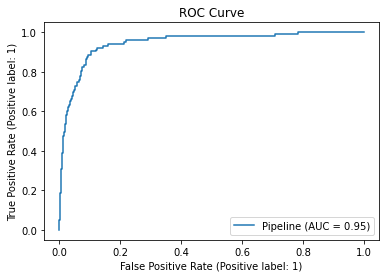

In [25]:
from sklearn.metrics import plot_roc_curve  

plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')

PR-AUC is 0.71


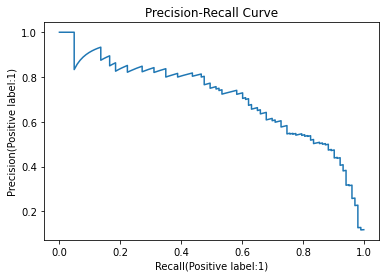

In [26]:
from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

y_score = y_test_proba[:, 1]
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()

#disp = plot_precision_recall_curve(model, X_test, y_test)

#### 2.3 Feature Importance

In [27]:
# get importance
importances = model.named_steps['logreg'].coef_[0]
features = model.feature_names_in_
features

array(['DeductibleAmtPaid_mean', 'DeductibleAmtPaid_max',
       'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean',
       'OPAnnualReimbursementAmt_mean', 'OPAnnualReimbursementAmt_max',
       'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_mean',
       'OPAnnualDeductibleAmt_max', 'OPAnnualDeductibleAmt_sum',
       'ClaimCounts', 'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace',
       'RenalDiseaseIndicator', 'Age', 'uniqBeneCount', 'ClmsperBene',
       'TotalInscClaimAmtReimbursed', 'MeanInscClaimAmtReimbursed',
       'MaxInscClaimAmtReimbursed', 'uniqATPhysnCount', 'ClmsperATPhysn',
       'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount',
       'ClmsperOTPhysn', 'InClmsPct', 'StateCount_Uniq', 'MajorState',
       'CountyCount_Uniq', 'MajorCounty', 'TotalIPAnnualReimbursementAmt',
       'MeanIPAnnualReimbursementAmt', 'MaxIPAnnualReimbursementAmt',
       'TotalIPAnnualDeductibleAmtdf', 'MeanIPAnnualDeductibleAmt',
       'MaxIPAnnualDeductibleAmt', '

In [28]:
logreg_importances = pd.Series(importances, index = features)
logreg_importances.sort_values(ascending = False)

ClmsperBene                         3.868697
MaxHospitalDays                     3.435215
TotalInscClaimAmtReimbursed         2.300077
MaxInscClaimAmtReimbursed           2.284157
TotalIPAnnualReimbursementAmt       2.103909
OPAnnualReimbursementAmt_sum        2.032693
OPAnnualDeductibleAmt_sum           2.007213
ClaimCounts                         1.937259
TotalIPAnnualDeductibleAmtdf        1.931848
uniqBeneCount                       1.762703
ClmsperOPPhysn                      1.356068
CountyCount_Uniq                    1.169805
ClmsperOTPhysn                      1.159417
ClmsperATPhysn                      1.092578
MaxIPAnnualReimbursementAmt         0.791547
RaceOneFrac                         0.766916
Chronic_Heartfailure_Frac           0.724660
MajorState                          0.641463
OPAnnualDeductibleAmt_max           0.640367
RenalDiseaseIndicator               0.620243
Chronic_KidneyDisease_Frac          0.575343
DeductibleAmtPaid_mean              0.523829
InClmsPct 

<AxesSubplot:title={'center':'Feature Importance'}>

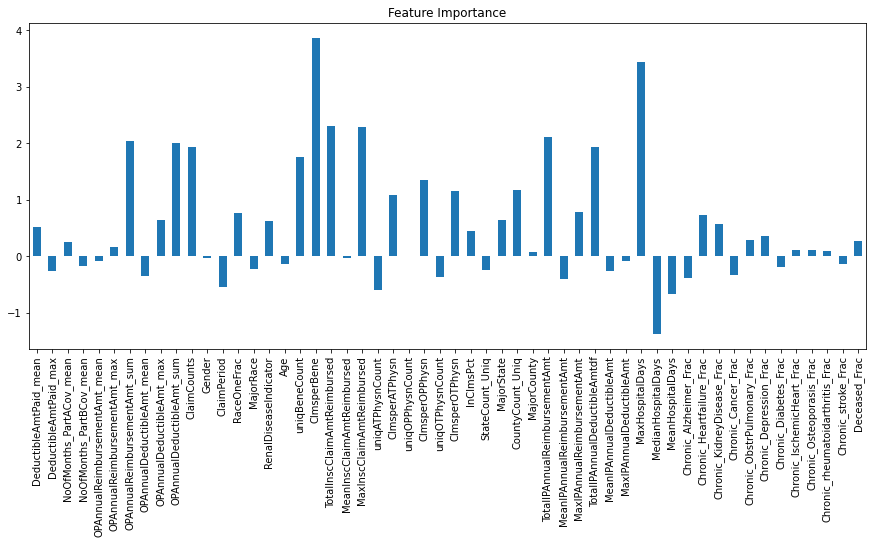

In [29]:
fig = plt.figure(figsize = (15,6))
logreg_importances.plot.bar(title = 'Feature Importance')

In [30]:
# summarize feature importance
# for i,v in enumerate(importances):
#     print('Feature: {:0d}, Score: {:.3f}'.format(i,v))
# # plot feature importance
# plt.figure(figsize=(15,4))
# plt.bar([x for x in range(len(importances))], importances)
# plt.title('Feature Importance')

# plt.show()

### 3. Modeling with balanced class weights: 
Set class_weight in Logistic Regression and retrain the model.

In [31]:
steps2 = [('rescale', StandardScaler()), 
          ('logreg', LogisticRegression(class_weight = 'balanced',random_state=42,max_iter=10000))]
model2 = Pipeline(steps2)
model2.fit(X_train, y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [32]:
y_train_pred2 = model2.predict(X_train)

In [33]:
y_train_proba2 = model2.predict_proba(X_train)

In [34]:
y_test_pred2 = model2.predict(X_test)

In [35]:
y_test_proba2 = model2.predict_proba(X_test)

In [36]:
roc_auc_score_train2 = roc_auc_score(y_train, model2.predict_proba(X_train)[:, 1])  
roc_auc_score_test2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train2))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test2))

roc_auc_score for the train dataset: 0.96
roc_auc_score for the test dataset: 0.93


In [37]:
y_score2 = y_test_proba2[:, 1]
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_score2)
auc_precision_recall2 = auc(recall2, precision2)
print('PR-AUC is {:.2f}'.format(auc_precision_recall2))

PR-AUC is 0.69


In [38]:
importances2 = model2.named_steps['logreg'].coef_[0]
features = model2.feature_names_in_
logreg_importances2 = pd.Series(importances2, index = features)
logreg_importances2.sort_values(ascending = False)

MaxHospitalDays                     1.389157
ClaimCounts                         1.301869
OPAnnualDeductibleAmt_sum           0.995621
TotalInscClaimAmtReimbursed         0.830321
DeductibleAmtPaid_mean              0.637651
ClmsperBene                         0.567027
OPAnnualReimbursementAmt_sum        0.474029
uniqOTPhysnCount                    0.441979
Chronic_Heartfailure_Frac           0.364820
MajorState                          0.303432
Chronic_KidneyDisease_Frac          0.291562
CountyCount_Uniq                    0.226757
MaxInscClaimAmtReimbursed           0.223078
NoOfMonths_PartACov_mean            0.211356
MaxIPAnnualReimbursementAmt         0.148301
StateCount_Uniq                     0.140874
MeanHospitalDays                    0.130862
ClmsperOPPhysn                      0.127262
RenalDiseaseIndicator               0.107686
Deceased_Frac                       0.099104
OPAnnualDeductibleAmt_max           0.091962
Chronic_Depression_Frac             0.082897
MeanInscCl

<AxesSubplot:title={'center':'Feature Importance with balanced class weight'}>

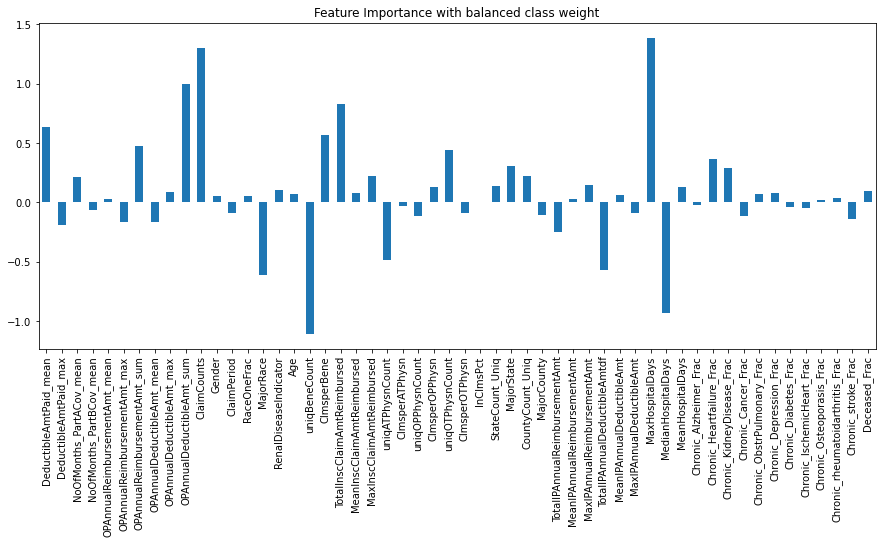

In [39]:
fig = plt.figure(figsize = (15,6))
logreg_importances2.plot.bar(title = 'Feature Importance with balanced class weight')

In [40]:
# # get importance
# importances2 = model2.named_steps['logreg'].coef_[0]
# # summarize feature importance
# for i,v in enumerate(importances2):
#     print('Feature: {:0d}, Score: {:.3f}'.format(i,v))
# # plot feature importance
# plt.figure(figsize=(15,4))
# plt.bar([x for x in range(len(importances2))], importances2)
# plt.title('Feature Importance')

### 4. Downsampling to 70:30

In [41]:
from sklearn.utils import resample #Resample arrays or sparse matrices in a consistent way

In [42]:
type(y_train)

numpy.ndarray

In [43]:
# Concat X_train with y_train on axis = 1 first
# only Series and DataFrame objs are valid. So need to convert y_train to Series. 
target_train = pd.Series(y_train)
target_train.name = "PotentialFraud"
target_train.index = X_train.index
target_train

Provider
PRV53960    0
PRV52517    0
PRV55652    0
PRV57328    0
PRV56721    0
           ..
PRV52471    0
PRV55316    0
PRV52671    0
PRV56782    0
PRV52602    0
Name: PotentialFraud, Length: 4328, dtype: int64

In [44]:
df_train = pd.concat([X_train,target_train],axis = 1)

In [45]:
df_train_nonfraud = df_train[df_train.PotentialFraud == 0]
df_train_fraud = df_train[df_train.PotentialFraud == 1]

In [46]:
df_train_nf_downsampled = resample(df_train_nonfraud, 
                                  replace=False,    # sample without replacement
                                  n_samples=940,     # to match the ratio of 70/30
                                  random_state=42)

In [47]:
# Combine minority class with downsampled majority class
df_train_downsampled = pd.concat([df_train_nf_downsampled, df_train_fraud])

In [48]:
# Display new class counts
df_train_downsampled.PotentialFraud.value_counts()

0    940
1    403
Name: PotentialFraud, dtype: int64

In [49]:
#df_train_downsampled.to_csv('data/df_train_downsampled7030.csv')

In [50]:
#Split X_train and y_train
X_train_downsampled = df_train_downsampled.iloc[:,:-1]
X_train_downsampled.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV57552,0.000000,0.0,12.0,10.909091,1303.636364,4090,14340,453.636364,1110,4990,...,0.545455,0.181818,0.363636,0.727273,0.636364,0.727273,0.181818,0.181818,0.181818,0.000000
PRV52848,4.400000,70.0,12.0,11.760000,1275.600000,5210,31890,472.800000,1970,11820,...,0.200000,0.200000,0.360000,0.400000,0.600000,0.840000,0.320000,0.160000,0.040000,0.000000
PRV51297,77.285714,1068.0,12.0,12.000000,3440.000000,22820,240800,869.714286,5220,60880,...,0.557143,0.142857,0.300000,0.471429,0.642857,0.871429,0.385714,0.171429,0.100000,0.014286
PRV55880,2.666667,40.0,12.0,12.000000,2586.666667,19660,38800,712.666667,3980,10690,...,0.533333,0.200000,0.200000,0.466667,0.800000,0.733333,0.466667,0.400000,0.066667,0.000000
PRV55887,1068.000000,1068.0,12.0,12.000000,4031.666667,19660,24190,935.000000,3980,5610,...,0.666667,0.500000,0.666667,0.833333,0.833333,0.833333,0.166667,0.666667,0.166667,0.000000


In [51]:
y_train_downsampled = df_train_downsampled.iloc[:,-1]

### Re-run logistic regression model

In [52]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight = 'balanced', classes = np.unique(df_train.PotentialFraud),y = df_train.PotentialFraud)

array([0.55133758, 5.36972705])

In [54]:
# to upweight the downsampled class 
# example weight = original weight * downsampling factor 
# class 1 (minority) no change 
# class 0 (majority)
0.551337588*(3925/940)

2.302127694574468

In [55]:
steps = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(class_weight = [2.302127694574468,5.36972705],random_state=42,max_iter=10000))]
model3 = Pipeline(steps)
model3.fit(X_train_downsampled, y_train_downsampled)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight=[2.302127694574468,
                                                  5.36972705],
                                    max_iter=10000, random_state=42))])

In [56]:
y_test_pred = model3.predict(X_test)

In [57]:
y_test_proba = model3.predict_proba(X_test)

In [58]:
roc_auc_score_train = roc_auc_score(y_train_downsampled, model.predict_proba(X_train_downsampled)[:, 1])  
roc_auc_score_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 0.95
roc_auc_score for the test dataset: 0.95


In [59]:
y_score = y_test_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

PR-AUC is 0.70


In [60]:
importances3 = model3.named_steps['logreg'].coef_[0]
features = model3.feature_names_in_
logreg_importances3 = pd.Series(importances3, index = features)
logreg_importances3.sort_values(ascending = False)

MaxHospitalDays                     1.673370
OPAnnualDeductibleAmt_sum           1.433685
TotalInscClaimAmtReimbursed         1.246891
ClaimCounts                         0.972916
OPAnnualReimbursementAmt_sum        0.845267
uniqOTPhysnCount                    0.721441
DeductibleAmtPaid_mean              0.581284
ClmsperBene                         0.580565
InClmsPct                           0.476513
MajorState                          0.359773
MeanInscClaimAmtReimbursed          0.323839
MaxIPAnnualReimbursementAmt         0.294176
Chronic_Depression_Frac             0.271517
CountyCount_Uniq                    0.220308
uniqOPPhysnCount                    0.219683
Chronic_Heartfailure_Frac           0.187472
OPAnnualDeductibleAmt_max           0.182058
Deceased_Frac                       0.165831
Chronic_KidneyDisease_Frac          0.159309
RenalDiseaseIndicator               0.154634
ClmsperOPPhysn                      0.142402
NoOfMonths_PartACov_mean            0.137054
MaxInscCla

<AxesSubplot:title={'center':'Feature Importance with Downsampling 70/30'}>

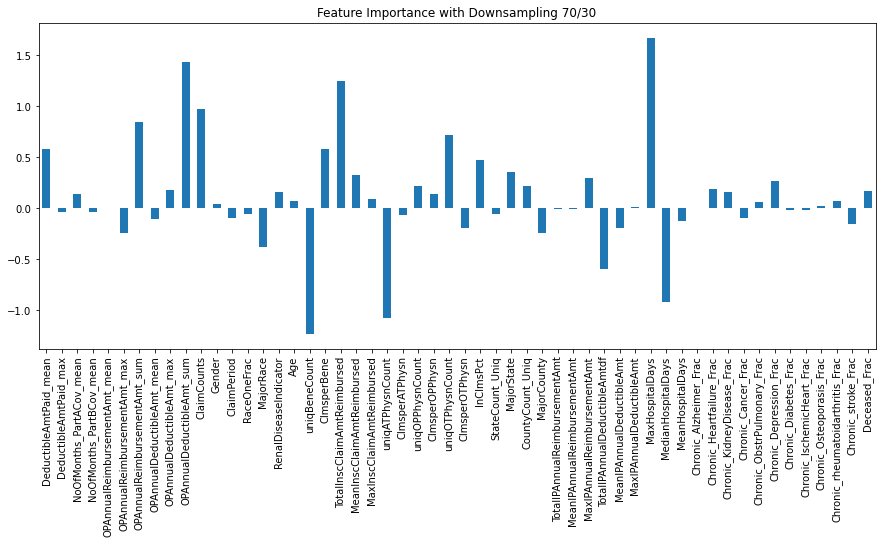

In [61]:
fig = plt.figure(figsize = (15,6))
logreg_importances3.plot.bar(title = 'Feature Importance with Downsampling 70/30')

### 5. Downsampling to 50:50

In [62]:
# The number of nonfraud samples needed if to downsample majority class to 50/50
df_train_nf_downsampled2 = resample(df_train_nonfraud, 
                                  replace=False,    # sample without replacement
                                  n_samples=403,     # to match the ratio of 50/50
                                  random_state=42)

In [63]:
df_train_downsampled5050 = pd.concat([df_train_nf_downsampled2, df_train_fraud])

In [64]:
df_train_downsampled5050.PotentialFraud.value_counts()

0    403
1    403
Name: PotentialFraud, dtype: int64

In [65]:
#df_train_downsampled5050.to_csv('data/df_train_downsampled5050.csv')

In [66]:
X_train_downsampled2 = df_train_downsampled5050.iloc[:,:-1]
X_train_downsampled2.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV57552,0.000000,0.0,12.0,10.909091,1303.636364,4090,14340,453.636364,1110,4990,...,0.545455,0.181818,0.363636,0.727273,0.636364,0.727273,0.181818,0.181818,0.181818,0.000000
PRV52848,4.400000,70.0,12.0,11.760000,1275.600000,5210,31890,472.800000,1970,11820,...,0.200000,0.200000,0.360000,0.400000,0.600000,0.840000,0.320000,0.160000,0.040000,0.000000
PRV51297,77.285714,1068.0,12.0,12.000000,3440.000000,22820,240800,869.714286,5220,60880,...,0.557143,0.142857,0.300000,0.471429,0.642857,0.871429,0.385714,0.171429,0.100000,0.014286
PRV55880,2.666667,40.0,12.0,12.000000,2586.666667,19660,38800,712.666667,3980,10690,...,0.533333,0.200000,0.200000,0.466667,0.800000,0.733333,0.466667,0.400000,0.066667,0.000000
PRV55887,1068.000000,1068.0,12.0,12.000000,4031.666667,19660,24190,935.000000,3980,5610,...,0.666667,0.500000,0.666667,0.833333,0.833333,0.833333,0.166667,0.666667,0.166667,0.000000


In [67]:
y_train_downsampled2 = df_train_downsampled5050.iloc[:,-1]

### Re-run logistic regression model

In [71]:
# the class weight for class 0 after downsampling 
0.55133758*(3925/403)

5.369727050868486

In [72]:
steps = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(class_weight = [5.369727050868486,5.36972705],random_state=42,max_iter=10000))]
model4 = Pipeline(steps)
model4.fit(X_train_downsampled2, y_train_downsampled2)

Pipeline(steps=[('rescale', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight=[5.369727050868486,
                                                  5.36972705],
                                    max_iter=10000, random_state=42))])

In [73]:
y_test_pred = model4.predict(X_test)

In [74]:
y_test_proba = model4.predict_proba(X_test)

In [75]:
roc_auc_score_train = roc_auc_score(y_train_downsampled2, model4.predict_proba(X_train_downsampled2)[:, 1])  
roc_auc_score_test = roc_auc_score(y_test, model4.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 0.96
roc_auc_score for the test dataset: 0.93


In [76]:
y_score = y_test_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

PR-AUC is 0.67


In [77]:
importances4 = model4.named_steps['logreg'].coef_[0]
features = model4.feature_names_in_
logreg_importances4 = pd.Series(importances4, index = features)
logreg_importances4.sort_values(ascending = False)

MaxHospitalDays                     1.694938
OPAnnualDeductibleAmt_sum           1.400343
MeanInscClaimAmtReimbursed          1.122225
ClmsperBene                         0.842444
OPAnnualReimbursementAmt_sum        0.738052
TotalInscClaimAmtReimbursed         0.700154
ClaimCounts                         0.692183
uniqOTPhysnCount                    0.570402
MeanIPAnnualDeductibleAmt           0.431475
DeductibleAmtPaid_mean              0.430752
MaxInscClaimAmtReimbursed           0.396106
MajorState                          0.390363
RenalDiseaseIndicator               0.351987
Chronic_KidneyDisease_Frac          0.305792
InClmsPct                           0.303353
Chronic_Heartfailure_Frac           0.280201
OPAnnualDeductibleAmt_max           0.279583
MaxIPAnnualReimbursementAmt         0.260239
ClmsperOPPhysn                      0.239976
Age                                 0.194299
TotalIPAnnualReimbursementAmt       0.193465
Gender                              0.167460
CountyCoun

<AxesSubplot:title={'center':'Feature Importance with Downsampling 50/50'}>

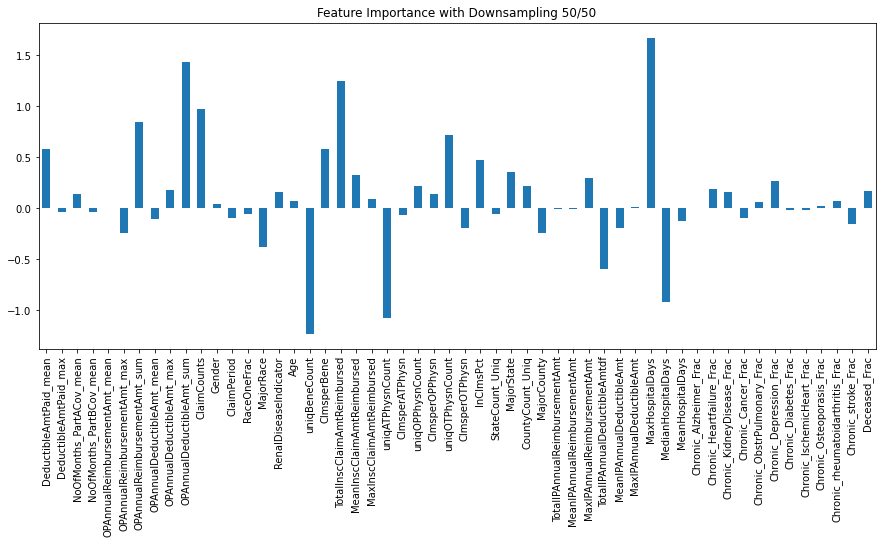

In [78]:
fig = plt.figure(figsize = (15,6))
logreg_importances3.plot.bar(title = 'Feature Importance with Downsampling 50/50')